In [1]:
using thesis
using Plots
using JLD2
using LinearAlgebra
using DataFrames
using LaTeXStrings

In [21]:
function plot_results(
    data,
    errors,
    instrument,
    parameter_indx
)
    plots_1 = []
    plots_2 = []
    parameters = [L"Synchrotron index"]
    param_value = [-3.0]
    for e in error
        ideal_value = [data[instrument][e]["ideal"]["x"][parameter_indx]]

        a = bar(["ideal"], -3 .- [data[instrument][e]["ideal"]["x"][parameter_indx]], legend = false, kind = "bar")
        for i in labels
            a = bar!([i], -3 .- [data[instrument][e][i]["x"][parameter_indx]])
        end
        a = title!(e)
        push!(plots_1, a)

        b = bar(["ideal"], ideal_value .- [data[instrument][e]["ideal"]["x"][parameter_indx]])
        b = hline!([0])
        for i in labels
            b = bar!([i], ideal_value .- [data[instrument][e][i]["x"][parameter_indx]], legend = false)
        end
        b = title!(e)
        push!(plots_2, b)
    end
    #a = plot(plots_1..., size = (1300, 400), layout = (1,3), bottom_margin = 11Plots.mm, left_margin = 7Plots.mm, link=:all)
    a = plot(plots_2..., size = (1300, 400), layout = (1,3),xrotation=45, bottom_margin = 11Plots.mm, left_margin = 7Plots.mm, link=:all)
    #plot(a,b, layout=(2,1))
    plot(a, plot_title = instrument)
end

plot_results (generic function with 1 method)

In [3]:
instrument = ["lspe_planck_wmap"]
error = ["0_5arcmin" "1arcmin" "5arcmin"]
labels = ["altitude_offset" "ground_offset" "fork" "zVAX&ω_0" "zVAX&ω_90" "zVAX&ω_180" "zVAX&ω_270"]

1×7 Matrix{String}:
 "altitude_offset"  "ground_offset"  "fork"  …  "zVAX&ω_180"  "zVAX&ω_270"

In [4]:
data = Dict()
for i in instrument
    buffer = Dict()
    for e in error
        buffer[e] = JLD2.load("fgbuster/c1s0d0/results_"*i*"_"*e*".jld2")
    end
    data[i] = buffer
end

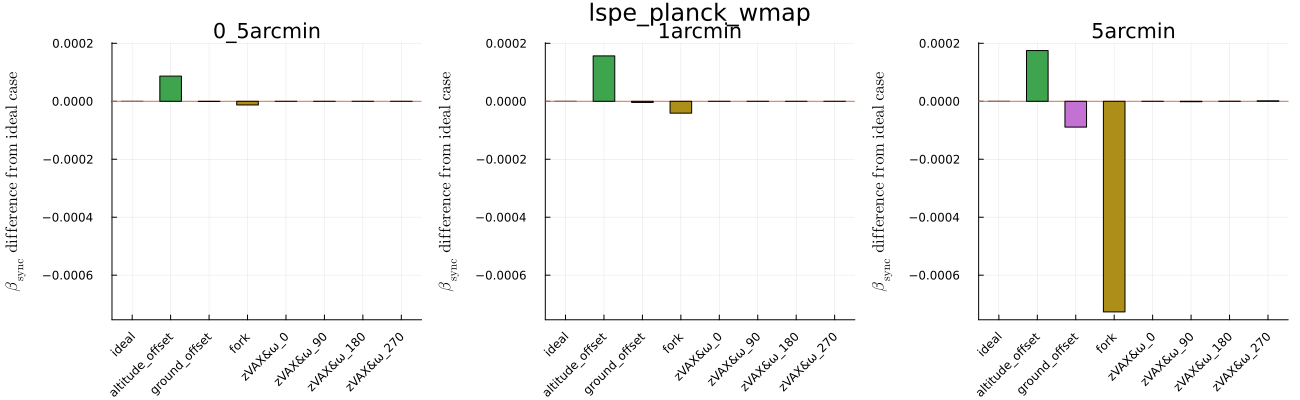

In [22]:
plots = []
for i in instrument
    push!(plots, plot_results(data, error, i, 1))
end
plot(plots..., layout = (3,1), size = (1300, 400), link=:x)
yaxis!(L"\textrm{β_{sync}\ difference \ from \ ideal \ case}")

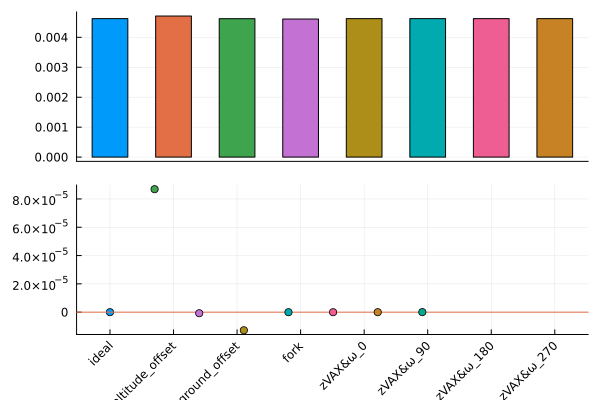

In [6]:
e = "0_5arcmin"
ideal_value = [data["lspe_planck_wmap"][e]["ideal"]["x"][1]]

a = bar(xticks=false)
a = bar!(["ideal"], -3 .- [data["lspe_planck_wmap"][e]["ideal"]["x"][1]], legend = false)
for i in labels
    a = bar!([i], -3 .- [data["lspe_planck_wmap"][e][i]["x"][1]])
end

b = plot(["ideal"], ideal_value .- [data["lspe_planck_wmap"][e]["ideal"]["x"][1]], seriestype=:scatter)
b = hline!([0])
for i in labels
    b = plot!([i], ideal_value .- [data["lspe_planck_wmap"][e][i]["x"][1]], legend = false, seriestype=:scatter)
end

plot(a,b, layout=(2,1), xrotation=45, link=:x)

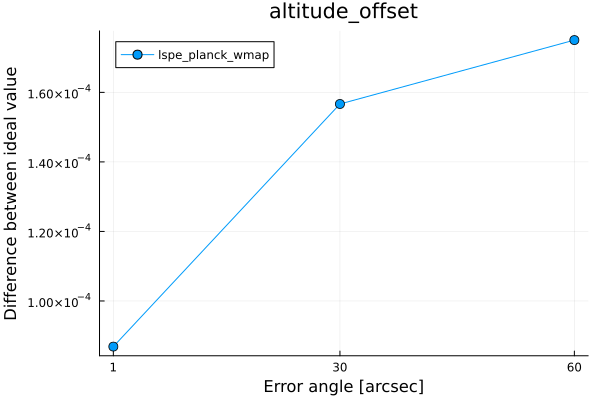

In [10]:
l = "altitude_offset"
i = "lspe_planck_wmap"

ideal = [data[i][k]["ideal"]["x"][1] for k in error]
ideal_sigma = [ sqrt.(diag(data[i][k]["ideal"]["Sigma"]))[1] for k in error]
plot_data = [data[i][k][l]["x"][1] for k in error]
plot_x = [1.0/3600, 0.5/60, 1.0/60]
data_sigma = [ sqrt.(diag(data[i][k][l]["Sigma"]))[1] for k in error]

yerror = sqrt.(ideal_sigma.^2 .+ data_sigma.^2)

plot(plot_x, [abs.(ideal .- plot_data)...], marker=(:circle,5), label = i)#, yerror = yerror)

plot!(xticks = ([plot_x...],["1", "30", "60"]))
xaxis!("Error angle [arcsec]")
yaxis!("Difference between ideal value")
title!(l)

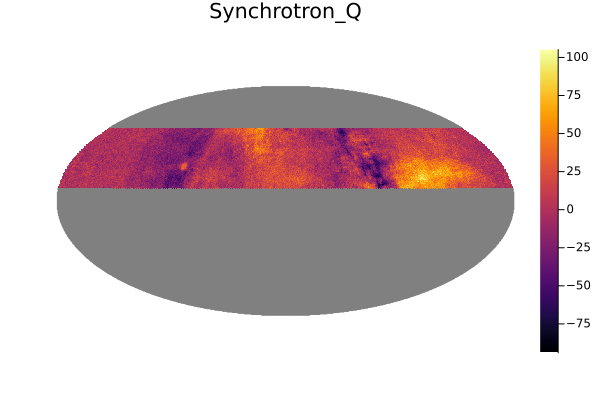

In [18]:
get_map_and_hist(data["lspe_planck_wmap"]["0_5arcmin"]["ideal"], "Q", 128)[1][3]